## Keras Building Auto Encoder Examples
https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

/Users/admin/GitHub/nn/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
# configure the model to use a per-pixel binary crossentropy loss, and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Input: MINST dataset
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# normalize all values between 0 and 1 and flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
# Train for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2800 - val_loss: 0.1907
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1719 - val_loss: 0.1543
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1447 - val_loss: 0.1345
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1293 - val_loss: 0.1220
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1190 - val_loss: 0.1136
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1119 - val_loss: 0.1078
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1069 - val_loss: 0.1036
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1032 - val_loss: 0.1004
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1005 - val_loss: 0.0981
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0984 - val_loss: 0.0965

In [9]:
# visualize the reconstructed inputs and the encoded representations.
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 422us/step


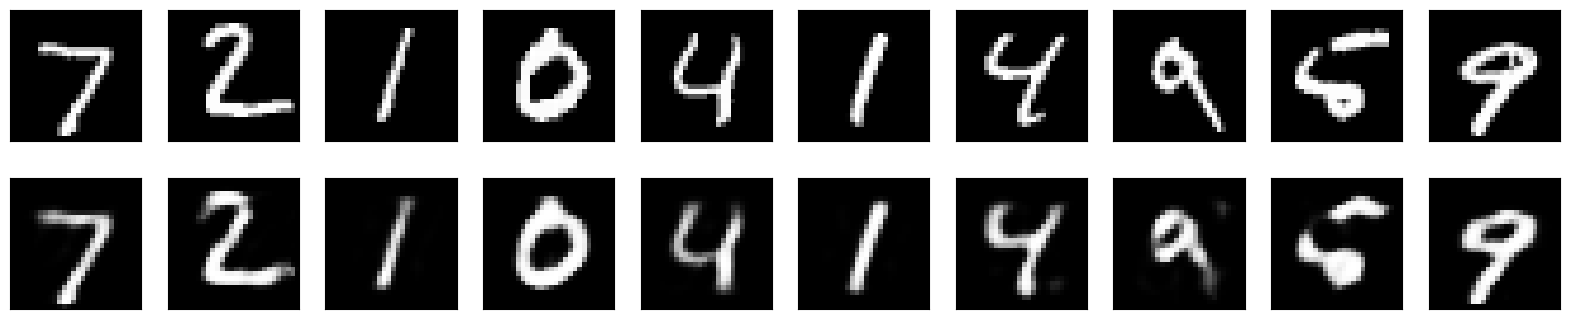

In [10]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Adding a sparsity constraint on the encoded representations

In [11]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
#   Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [12]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [13]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [14]:
# configure the model to use a per-pixel binary crossentropy loss, and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
# Train for 100 epochs
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2881 - val_loss: 0.1977
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1784 - val_loss: 0.1614
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1532 - val_loss: 0.1436
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1390 - val_loss: 0.1320
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1290 - val_loss: 0.1236
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1220 - val_loss: 0.1178
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1170 - val_loss: 0.1137
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1134 - val_loss: 0.1107
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1108 - val_loss: 0.1086
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1090 - val_lo

KeyboardInterrupt: 

In [ ]:
# due to the sparsity regularization of the encoder activation, the encoded representations,
# encoded_imgs.mean() yields a smaller value than without using the sparsity (L1) regularization
encoded_imgs.mean()

In [ ]:
# visualize the reconstructed inputs and the encoded representations.
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
# Use Matplotlib to print some output images
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Deep autoencoder
We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

Let's try this:

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
# visualize the reconstructed inputs and the encoded representations.
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
# Use Matplotlib to print some output images
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

One may also use convolutional layers instead of dense layers to realize the auto-encoder.

## Visualize encoder output
We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((2, 4 * 4)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()